In [0]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
import librosa as lr
from librosa import display
import os
import time
import IPython.display as ipd
from matplotlib.pyplot import specgram
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import torch.optim as optim

**ДАЛЕЕ пропускаем до следующего заголовка**


**тут идет преобразование из аудио в mfcc**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = './drive/My Drive/TESS'
start = time.time()

data = []

for subdir, dirs, files in os.walk(path):
    
    for file in files:
        print(file)
        target = str(file.split('_')[2])[:-4]
        
        y, sr = lr.load(os.path.join(subdir, file), res_type='kaiser_fast')
        mfccs = np.mean(lr.feature.mfcc(y=y, sr=sr, n_mfcc=30).T, axis=0)
        sample = mfccs, target
        data.append(sample)
        
        
end = time.time()
print(f'Writing ended in {end - start} seconds')

YAF_limb_angry.wav
YAF_loaf_angry.wav
YAF_boat_angry.wav
YAF_haze_angry.wav
YAF_life_angry.wav
YAF_date_angry.wav
YAF_mill_angry.wav
YAF_cab_angry.wav
YAF_food_angry.wav
YAF_met_angry.wav
YAF_lease_angry.wav
YAF_gun_angry.wav
YAF_chief_angry.wav
YAF_dip_angry.wav
YAF_ditch_angry.wav
YAF_bought_angry.wav
YAF_dead_angry.wav
YAF_dodge_angry.wav
YAF_hire_angry.wav
YAF_live_angry.wav
YAF_mode_angry.wav
YAF_dog_angry.wav
YAF_hush_angry.wav
YAF_half_angry.wav
YAF_kick_angry.wav
YAF_hate_angry.wav
YAF_gas_angry.wav
YAF_gaze_angry.wav
YAF_cool_angry.wav
YAF_came_angry.wav
YAF_lose_angry.wav
YAF_chair_angry.wav
YAF_hurl_angry.wav
YAF_make_angry.wav
YAF_chalk_angry.wav
YAF_bean_angry.wav
YAF_door_angry.wav
YAF_base_angry.wav
YAF_cheek_angry.wav
YAF_judge_angry.wav
YAF_keen_angry.wav
YAF_juice_angry.wav
YAF_bite_angry.wav
YAF_jail_angry.wav
YAF_death_angry.wav
YAF_learn_angry.wav
YAF_dab_angry.wav
YAF_doll_angry.wav
YAF_join_angry.wav
YAF_goose_angry.wav
YAF_have_angry.wav
YAF_get_angry.wav
YAF_ho

In [0]:
encoder = LabelEncoder()
X, y = zip(*data)
dataset_TESS = pd.DataFrame(X,(y))
dataset_TESS = dataset_TESS.reset_index()
dataset_TESS.rename(columns={
    'index': 'target'
}, inplace=True)
dataset_TESS

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,angry,-288.719238,62.625057,-26.012300,23.225218,-28.039703,1.384188,-5.769329,-26.590179,-8.337161,3.882570,-16.776693,15.048624,-17.009379,8.204889,-8.419133,-3.042995,-2.853031,-3.480418,-9.634763,-0.841553,-8.989638,-3.340496,-6.500668,-3.532383,2.340446,2.314551,6.479390,8.629872,9.891662,11.445866
1,angry,-336.208311,36.680333,-15.951548,16.189888,-38.497388,2.420249,-6.803961,-17.491220,-10.960154,1.209005,-18.414233,14.404779,-16.735626,11.631417,-3.544319,-1.275898,-4.545909,1.838945,-11.096297,1.875719,-6.885620,-2.792886,-3.085515,-0.578676,2.438645,6.263263,12.077331,12.048487,13.101062,8.039965
2,angry,-290.566195,40.682354,-2.650168,20.170969,-22.214548,0.604162,-4.247833,-12.081742,-13.032407,7.241806,-21.650756,19.802852,-15.418545,5.087153,-2.220677,-4.933372,-4.629499,0.685135,-10.919030,0.607814,-3.541259,0.436362,-1.587191,3.207095,3.765254,5.730272,8.288566,8.965569,11.195302,9.672714
3,angry,-322.739539,28.126587,-22.118054,31.071080,-32.006755,-5.765176,-5.862902,-15.413687,-15.998795,2.675008,-24.646369,16.026823,-18.812840,8.935947,-3.171171,-4.239376,-3.578398,0.808206,-11.561155,3.003355,-9.283504,-2.276332,-4.171698,-2.102831,0.329298,0.650865,4.018254,8.352911,12.050802,12.737470
4,angry,-298.179893,26.212140,-17.609021,17.530507,-41.873195,1.158211,-11.125472,-14.612097,-13.102758,2.743019,-19.784421,11.994551,-14.703369,11.624960,-4.524026,-1.028315,-2.856119,2.978731,-6.919733,7.741834,-8.751142,-3.490935,-5.800866,-1.101993,2.604727,9.242943,10.418622,13.430240,12.485438,10.559605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,sad,-414.832950,61.244351,24.871053,47.345543,-4.288396,13.609492,-9.357812,-4.297829,-3.560240,-3.150320,-8.164874,5.476147,-10.508392,13.604570,-11.413971,0.791616,-0.757561,-1.635747,-6.125608,-2.564084,-9.955692,-5.594611,-6.210800,1.612399,-1.467517,6.492705,4.678569,1.541366,-0.044082,-2.797336
2796,sad,-428.959335,87.337324,22.923531,45.436908,1.115740,13.786090,-7.202889,-3.144844,-4.436021,-2.698256,-7.800564,4.285019,-11.191120,12.914526,-8.872678,0.745861,-1.424217,-2.132208,-5.130519,-2.545467,-7.711856,-7.322291,-5.895929,0.338453,-1.289090,3.957989,4.913312,-0.567617,0.554816,-2.419987
2797,sad,-401.938887,73.464665,13.728966,38.863063,-9.918325,10.162456,-12.362507,-3.936528,-8.784573,2.356496,-12.004982,6.065647,-9.977413,10.754484,-11.822516,0.682267,-2.376861,-3.839203,-7.106313,-1.439393,-7.777997,-6.234301,-3.543106,1.875174,4.752844,6.845292,4.896251,-2.393515,-1.021983,-2.362567
2798,sad,-409.457717,96.403305,18.716205,38.404808,-8.669222,9.568859,-11.840629,-9.701875,-3.409422,-5.738217,-12.523611,4.344593,-9.716480,9.823640,-13.522435,-1.233884,0.662549,-7.272150,-7.815291,-0.946482,-7.765716,-5.405130,-6.345154,-0.184834,-2.718265,3.865090,3.677224,-0.122556,2.424672,-2.263419


In [0]:
emotions = {
    '00': 'neutral',
    '01': 'happy',
    '02': 'sad',
    '03': 'angry',
    '04': 'fear',
    '05': 'disgust',
    '06': 'ps'
}

In [0]:
encoder = LabelEncoder()
X, y = zip(*data)
Y = []
emotions_inv = {value: key for key, value in emotions.items()}
for i in range(len(y)):
  Y.append(int(emotions_inv[y[i]]))

In [0]:
dataset = pd.DataFrame(X,(Y))
dataset = dataset.reset_index()
dataset.rename(columns={
    'index': 'target'
}, inplace=True)
dataset

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,3,-288.719238,62.625057,-26.012300,23.225218,-28.039703,1.384188,-5.769329,-26.590179,-8.337161,3.882570,-16.776693,15.048624,-17.009379,8.204889,-8.419133,-3.042995,-2.853031,-3.480418,-9.634763,-0.841553,-8.989638,-3.340496,-6.500668,-3.532383,2.340446,2.314551,6.479390,8.629872,9.891662,11.445866
1,3,-336.208311,36.680333,-15.951548,16.189888,-38.497388,2.420249,-6.803961,-17.491220,-10.960154,1.209005,-18.414233,14.404779,-16.735626,11.631417,-3.544319,-1.275898,-4.545909,1.838945,-11.096297,1.875719,-6.885620,-2.792886,-3.085515,-0.578676,2.438645,6.263263,12.077331,12.048487,13.101062,8.039965
2,3,-290.566195,40.682354,-2.650168,20.170969,-22.214548,0.604162,-4.247833,-12.081742,-13.032407,7.241806,-21.650756,19.802852,-15.418545,5.087153,-2.220677,-4.933372,-4.629499,0.685135,-10.919030,0.607814,-3.541259,0.436362,-1.587191,3.207095,3.765254,5.730272,8.288566,8.965569,11.195302,9.672714
3,3,-322.739539,28.126587,-22.118054,31.071080,-32.006755,-5.765176,-5.862902,-15.413687,-15.998795,2.675008,-24.646369,16.026823,-18.812840,8.935947,-3.171171,-4.239376,-3.578398,0.808206,-11.561155,3.003355,-9.283504,-2.276332,-4.171698,-2.102831,0.329298,0.650865,4.018254,8.352911,12.050802,12.737470
4,3,-298.179893,26.212140,-17.609021,17.530507,-41.873195,1.158211,-11.125472,-14.612097,-13.102758,2.743019,-19.784421,11.994551,-14.703369,11.624960,-4.524026,-1.028315,-2.856119,2.978731,-6.919733,7.741834,-8.751142,-3.490935,-5.800866,-1.101993,2.604727,9.242943,10.418622,13.430240,12.485438,10.559605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2,-414.832950,61.244351,24.871053,47.345543,-4.288396,13.609492,-9.357812,-4.297829,-3.560240,-3.150320,-8.164874,5.476147,-10.508392,13.604570,-11.413971,0.791616,-0.757561,-1.635747,-6.125608,-2.564084,-9.955692,-5.594611,-6.210800,1.612399,-1.467517,6.492705,4.678569,1.541366,-0.044082,-2.797336
2796,2,-428.959335,87.337324,22.923531,45.436908,1.115740,13.786090,-7.202889,-3.144844,-4.436021,-2.698256,-7.800564,4.285019,-11.191120,12.914526,-8.872678,0.745861,-1.424217,-2.132208,-5.130519,-2.545467,-7.711856,-7.322291,-5.895929,0.338453,-1.289090,3.957989,4.913312,-0.567617,0.554816,-2.419987
2797,2,-401.938887,73.464665,13.728966,38.863063,-9.918325,10.162456,-12.362507,-3.936528,-8.784573,2.356496,-12.004982,6.065647,-9.977413,10.754484,-11.822516,0.682267,-2.376861,-3.839203,-7.106313,-1.439393,-7.777997,-6.234301,-3.543106,1.875174,4.752844,6.845292,4.896251,-2.393515,-1.021983,-2.362567
2798,2,-409.457717,96.403305,18.716205,38.404808,-8.669222,9.568859,-11.840629,-9.701875,-3.409422,-5.738217,-12.523611,4.344593,-9.716480,9.823640,-13.522435,-1.233884,0.662549,-7.272150,-7.815291,-0.946482,-7.765716,-5.405130,-6.345154,-0.184834,-2.718265,3.865090,3.677224,-0.122556,2.424672,-2.263419


In [0]:
dataset.to_csv('TESSMFCC3.csv')

**ЗАПУСКАЕМ С ЭТОЙ ТОЧКИ**

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/grigorev-max/emotions/master/TESSMFCC')

In [0]:
dataset

,Unnamed: 0,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,3,-288.719238,62.625057,-26.012300,23.225218,-28.039703,1.384188,-5.769329,-26.590179,-8.337161,3.882570,-16.776693,15.048624,-17.009379,8.204889,-8.419133,-3.042995,-2.853031,-3.480418,-9.634763,-0.841553,-8.989638,-3.340496,-6.500668,-3.532383,2.340446,2.314551,6.479390,8.629872,9.891662,11.445866
1,1,3,-336.208311,36.680333,-15.951548,16.189888,-38.497388,2.420249,-6.803961,-17.491220,-10.960154,1.209005,-18.414233,14.404779,-16.735626,11.631417,-3.544319,-1.275898,-4.545909,1.838945,-11.096297,1.875719,-6.885620,-2.792886,-3.085515,-0.578676,2.438645,6.263263,12.077331,12.048487,13.101062,8.039965
2,2,3,-290.566195,40.682354,-2.650168,20.170969,-22.214548,0.604162,-4.247833,-12.081742,-13.032407,7.241806,-21.650756,19.802852,-15.418545,5.087153,-2.220677,-4.933372,-4.629499,0.685135,-10.919030,0.607814,-3.541259,0.436362,-1.587191,3.207095,3.765254,5.730272,8.288566,8.965569,11.195302,9.672714
3,3,3,-322.739539,28.126587,-22.118054,31.071080,-32.006755,-5.765176,-5.862902,-15.413687,-15.998795,2.675008,-24.646369,16.026823,-18.812840,8.935947,-3.171171,-4.239376,-3.578398,0.808206,-11.561155,3.003355,-9.283504,-2.276332,-4.171698,-2.102831,0.329298,0.650865,4.018254,8.352911,12.050802,12.737470
4,4,3,-298.179893,26.212140,-17.609021,17.530507,-41.873195,1.158211,-11.125472,-14.612097,-13.102758,2.743019,-19.784421,11.994551,-14.703369,11.624960,-4.524026,-1.028315,-2.856119,2.978731,-6.919733,7.741834,-8.751142,-3.490935,-5.800866,-1.101993,2.604727,9.242943,10.418622,13.430240,12.485438,10.559605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,2,-414.832950,61.244351,24.871053,47.345543,-4.288396,13.609492,-9.357812,-4.297829,-3.560240,-3.150320,-8.164874,5.476147,-10.508392,13.604570,-11.413971,0.791616,-0.757561,-1.635747,-6.125608,-2.564084,-9.955692,-5.594611,-6.210800,1.612399,-1.467517,6.492705,4.678569,1.541366,-0.044082,-2.797336
2796,2796,2,-428.959335,87.337324,22.923531,45.436908,1.115740,13.786090,-7.202889,-3.144844,-4.436021,-2.698256,-7.800564,4.285019,-11.191120,12.914526,-8.872678,0.745861,-1.424217,-2.132208,-5.130519,-2.545467,-7.711856,-7.322291,-5.895929,0.338453,-1.289090,3.957989,4.913312,-0.567617,0.554816,-2.419987
2797,2797,2,-401.938887,73.464665,13.728966,38.863063,-9.918325,10.162456,-12.362507,-3.936528,-8.784573,2.356496,-12.004982,6.065647,-9.977413,10.754484,-11.822516,0.682267,-2.376861,-3.839203,-7.106313,-1.439393,-7.777997,-6.234301,-3.543106,1.875174,4.752844,6.845292,4.896251,-2.393515,-1.021983,-2.362567
2798,2798,2,-409.457717,96.403305,18.716205,38.404808,-8.669222,9.568859,-11.840629,-9.701875,-3.409422,-5.738217,-12.523611,4.344593,-9.716480,9.823640,-13.522435,-1.233884,0.662549,-7.272150,-7.815291,-0.946482,-7.765716,-5.405130,-6.345154,-0.184834,-2.718265,3.865090,3.677224,-0.122556,2.424672,-2.263419


In [0]:
pd.unique(dataset['target'])

array([3, 2, 5, 0, 4, 1, 6])

In [0]:
X = dataset_TESS.iloc[:, 2:].values
Y = dataset_TESS.iloc[:, 1].values
print(X[1], Y[1])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle = True)

[-336.2083109    36.68033277  -15.95154843   16.18988826  -38.49738761
    2.42024933   -6.80396124  -17.49121955  -10.96015391    1.20900517
  -18.41423333   14.40477935  -16.7356257    11.63141705   -3.54431905
   -1.27589833   -4.5459085     1.83894496  -11.09629717    1.87571923
   -6.88561982   -2.79288607   -3.08551464   -0.57867571    2.43864459
    6.26326278   12.07733115   12.04848698   13.10106194    8.03996457] 3


In [0]:
from sklearn import tree
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2.fit(X_train, y_train)
print('Accuracy: \n', clf.score(X_test, y_test))
print('Accuracy 2: \n', clf2.score(X_test, y_test))

Accuracy: 
 0.8654761904761905
Accuracy 2: 
 0.8797619047619047


In [0]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.score(X_test, y_test)
#print('Coefficient: \n', logistic.coef_)
#print('Intercept: \n', logistic.intercept_)
print('R² Value: \n', logistic.score(X_test, y_test))

R² Value: 
 0.9535714285714286


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn import svm
support = svm.SVC()
support.fit(X_train, y_train)
print('Accuracy: \n', support.score(X_test, y_test))
pred = support.predict(X_test)

Accuracy: 
 0.8369047619047619


In [0]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
print(RF.score(X_test, y_test))

0.9845238095238096


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GB = RandomForestClassifier()
GB.fit(X_train, y_train)
y_proba = RF.predict_proba(X_test)

print(GB.score(X_test, y_test))

0.9880952380952381


In [0]:
pip install scikit-plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


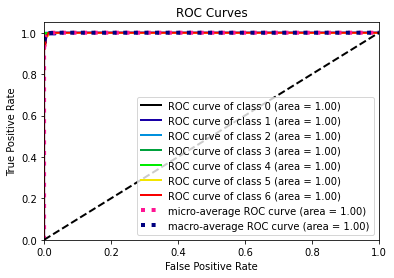

In [0]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test, y_proba)

**на этом пока все**

In [0]:
import joblib
import numpy as np
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization, LeakyReLU
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
X = np.expand_dims(dataset_TESS.iloc[:, 2:].values, axis=2)
y = to_categorical(dataset_TESS.iloc[:, 1].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(2240, 30, 1)
(2240, 7)


In [0]:
import joblib
import numpy as np
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization, LeakyReLU
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = np.expand_dims(dataset_TESS.iloc[:, 2:].values, axis=2)
y = to_categorical(dataset_TESS.iloc[:, 1].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

# Model definition
adam = Adam(lr=0.0005)
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, input_shape=(30, 1), activation=LeakyReLU()))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=3, activation=LeakyReLU()))
model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(rate=0.2))
model.add(BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=3, activation=LeakyReLU()))
model.add(Conv1D(filters=16, kernel_size=3, activation=LeakyReLU()))

model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=0.2))
model.add(Flatten())

model.add(Dropout(rate=0.2))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy', 'mae'])
print(model.summary())

training = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
val_loss = training.history['val_loss']
loss = training.history['loss']
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']
mae = training.history['mae']